In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
mvid = pd.read_csv("./data/MVID_101001_171001.txt")
sber = pd.read_csv("./data/SBER_101001_171001.txt")

In [23]:
sber.head()
sber.shape, mvid.shape

((1758, 6), (1758, 6))

In [24]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [25]:
res.shape

(1758, 11)

In [26]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

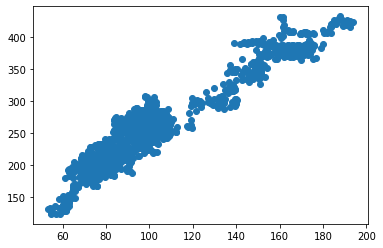

In [27]:
plt.figure()
plt.scatter(x,y)
plt.show()

y = b0 + b1 * x

In [28]:
class hypothesis():
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    def BGD(self, X, Y, alpha = 0.00005):
        dJ0 = sum(self.predict(X) - Y) / len(X)
        dJ1 = sum((self.predict(X) - Y) * X) / len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [29]:
reg = hypothesis()
print(reg.predict(0))
print(reg.predict(100))
print('Нач. ошибка:', reg.error(x, y))

0
0
Нач. ошибка: 36271.58344889084


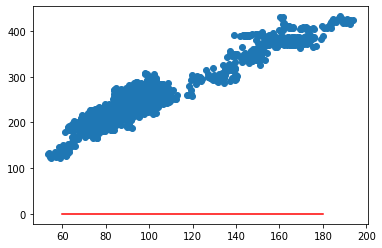

In [30]:
X0 = np.linspace(60, 180, 100)
Y0 = reg.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [31]:
np.linspace(60, 180, 100)

array([ 60.        ,  61.21212121,  62.42424242,  63.63636364,
        64.84848485,  66.06060606,  67.27272727,  68.48484848,
        69.6969697 ,  70.90909091,  72.12121212,  73.33333333,
        74.54545455,  75.75757576,  76.96969697,  78.18181818,
        79.39393939,  80.60606061,  81.81818182,  83.03030303,
        84.24242424,  85.45454545,  86.66666667,  87.87878788,
        89.09090909,  90.3030303 ,  91.51515152,  92.72727273,
        93.93939394,  95.15151515,  96.36363636,  97.57575758,
        98.78787879, 100.        , 101.21212121, 102.42424242,
       103.63636364, 104.84848485, 106.06060606, 107.27272727,
       108.48484848, 109.6969697 , 110.90909091, 112.12121212,
       113.33333333, 114.54545455, 115.75757576, 116.96969697,
       118.18181818, 119.39393939, 120.60606061, 121.81818182,
       123.03030303, 124.24242424, 125.45454545, 126.66666667,
       127.87878788, 129.09090909, 130.3030303 , 131.51515152,
       132.72727273, 133.93939394, 135.15151515, 136.36

In [32]:
reg.BGD(x, y)
J = reg.error(x, y)
print('ошибка: ', J)

ошибка:  6734.135540194945


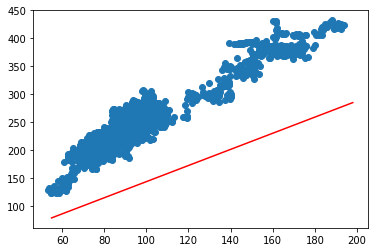

In [33]:
X0 = np.linspace(55, 198, 100)
Y0 = reg.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [34]:
class hypothesis():
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error (self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))
    def BGD(self, X, Y, alpha = 0.000005, accuracy = 0.0001, max_steps = 5000):
        steps, errors = [], []
        step = 0
        old_err = self.error(X, Y)
        new_err = self.error(X, Y) - 1
        dJ = 1
        while dJ > accuracy and (step < max_steps):
            dJ0 = sum(self.predict(X)-Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = self.error(X, Y)
            dJ = abs(old_err - new_err)
            print(dJ)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [35]:
reg = hypothesis()
steps, errors = reg.BGD(x, y)
J = reg.error(x, y)
print('Конечное значение ошибки:', J)

4030.7644014108337
3579.892778205929
3178.6659716137
2822.4078176128023
2506.078324650829
2225.202372777512
1975.806404029965
1754.3622084242652
1557.7370102957593
1383.1491488558422
1228.128725978766
1090.4826645013254
968.263682714095
859.7427461266725
763.3846067803725
677.8260840634812
601.8567797663327
534.40195455291
474.5073236006933
421.32555631342393
374.1042891174802
332.1754817586484
294.94596652264363
261.8890566791388
232.53709543344303
206.47483997622066
183.3335870346416
162.7859568195497
144.54126157675978
128.34139322120586
113.95717187661626
101.18510366290093
89.84450186403217
79.77493074928213
70.83393588557215
62.89502883164482
55.84589770344007
49.58681829551995
44.02924328065046
39.09454952890974
34.71292582462888
30.822385245658552
27.367888233098938
24.300563945493536
21.577018882018706
19.15872299372478
17.01146459812844
15.104866385813182
13.41195567201163
11.908782813464825
10.574082392324271
9.388972373820195
8.336686981752962
7.402339512682261
6.5727117334

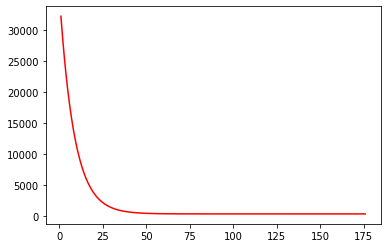

In [36]:
plt.figure()
plt.plot(steps, errors, 'r')
plt.show()

In [37]:
reg = hypothesis()
reg.BGD(x,y)
X0 = np.linspace(55, 198, 100)
Y0 = reg.predict(X0)

4030.7644014108337
3579.892778205929
3178.6659716137
2822.4078176128023
2506.078324650829
2225.202372777512
1975.806404029965
1754.3622084242652
1557.7370102957593
1383.1491488558422
1228.128725978766
1090.4826645013254
968.263682714095
859.7427461266725
763.3846067803725
677.8260840634812
601.8567797663327
534.40195455291
474.5073236006933
421.32555631342393
374.1042891174802
332.1754817586484
294.94596652264363
261.8890566791388
232.53709543344303
206.47483997622066
183.3335870346416
162.7859568195497
144.54126157675978
128.34139322120586
113.95717187661626
101.18510366290093
89.84450186403217
79.77493074928213
70.83393588557215
62.89502883164482
55.84589770344007
49.58681829551995
44.02924328065046
39.09454952890974
34.71292582462888
30.822385245658552
27.367888233098938
24.300563945493536
21.577018882018706
19.15872299372478
17.01146459812844
15.104866385813182
13.41195567201163
11.908782813464825
10.574082392324271
9.388972373820195
8.336686981752962
7.402339512682261
6.5727117334

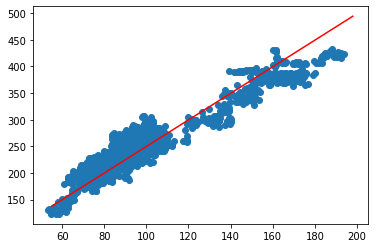

In [38]:
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()